In [1]:
import pandas as pd
import numpy as np
import matplotlib
import recruit_utils
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show


D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the funct

In [2]:
# Import data into pandas data frames
data, stores = recruit_utils.import_data()

In [26]:
print(stores.head())
print(stores.info())
print(stores.describe())

           air_store_id  dow  min_visitors  mean_visitors  median_visitors  \
0  air_00a91d42b08b08d9    0           1.0      22.457143             19.0   
1  air_0164b9927d20bcc3    0           2.0       7.500000              6.0   
2  air_0241aa3964b7f861    0           2.0       8.920635              8.0   
3  air_0328696196e46f18    0           2.0       6.416667              4.0   
4  air_034a3d5b40d5b1b1    0           1.0      11.864865             10.0   

   max_visitors  count_observations  air_genre_name  air_area_name   latitude  \
0          47.0                35.0               6             44  35.694003   
1          19.0                20.0               6             62  35.658068   
2          23.0                63.0               7             82  35.712607   
3          27.0                12.0               4             98  34.701279   
4          66.0                37.0               2            102  34.692337   

        ...        air_genre_name5  air_area

In [3]:
for df in data:
    print(data[df].head())
    print(data[df].info())
    print(data[df].describe())

           air_store_id  visit_date  visitors  dow  year  month
0  air_ba937bf13d40fb24  2016-01-13        25    2  2016      1
1  air_ba937bf13d40fb24  2016-01-14        32    3  2016      1
2  air_ba937bf13d40fb24  2016-01-15        29    4  2016      1
3  air_ba937bf13d40fb24  2016-01-16        22    5  2016      1
4  air_ba937bf13d40fb24  2016-01-18         6    0  2016      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 6 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dow             252108 non-null int64
year            252108 non-null int64
month           252108 non-null int64
dtypes: int64(4), object(2)
memory usage: 11.5+ MB
None
            visitors            dow           year          month
count  252108.000000  252108.000000  252108.000000  252108.000000
mean       20.973761       3.019678    2016.307697       6.208200
std        16.757007  

In [6]:
train, test = recruit_utils.create_train_test(data, stores)

In [7]:
train.head()

,air_store_id,visit_date,visitors,dow,year,month,day_of_week,holiday_flg,min_visitors,mean_visitors,...,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1,6,0,7.0,23.843750,...,-1.0,air_ba937bf13d40fb24_2016-01-13,-1.0,-1.0,-1.0,20160113,8.362564,4.521799,175.409667,603
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1,4,0,2.0,20.292308,...,-1.0,air_ba937bf13d40fb24_2016-01-14,-1.0,-1.0,-1.0,20160114,8.362564,4.521799,175.409667,603
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1,0,0,4.0,34.738462,...,-1.0,air_ba937bf13d40fb24_2016-01-15,-1.0,-1.0,-1.0,20160115,8.362564,4.521799,175.409667,603
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1,2,0,6.0,27.651515,...,-1.0,air_ba937bf13d40fb24_2016-01-16,-1.0,-1.0,-1.0,20160116,8.362564,4.521799,175.409667,603
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1,1,0,2.0,13.754386,...,-1.0,air_ba937bf13d40fb24_2016-01-18,-1.0,-1.0,-1.0,20160118,8.362564,4.521799,175.409667,603


In [8]:
test.head()

,id,visitors,visit_date,air_store_id,dow,year,month,day_of_week,holiday_flg,min_visitors,...,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,4,3,0,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170423,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,4,1,0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170424,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,4,5,0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170425,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,4,6,0,15.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170426,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,4,4,0,15.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170427,8.326629,4.519803,175.447598,0


In [9]:
output_notebook()

Loading BokehJS ...

In [10]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show

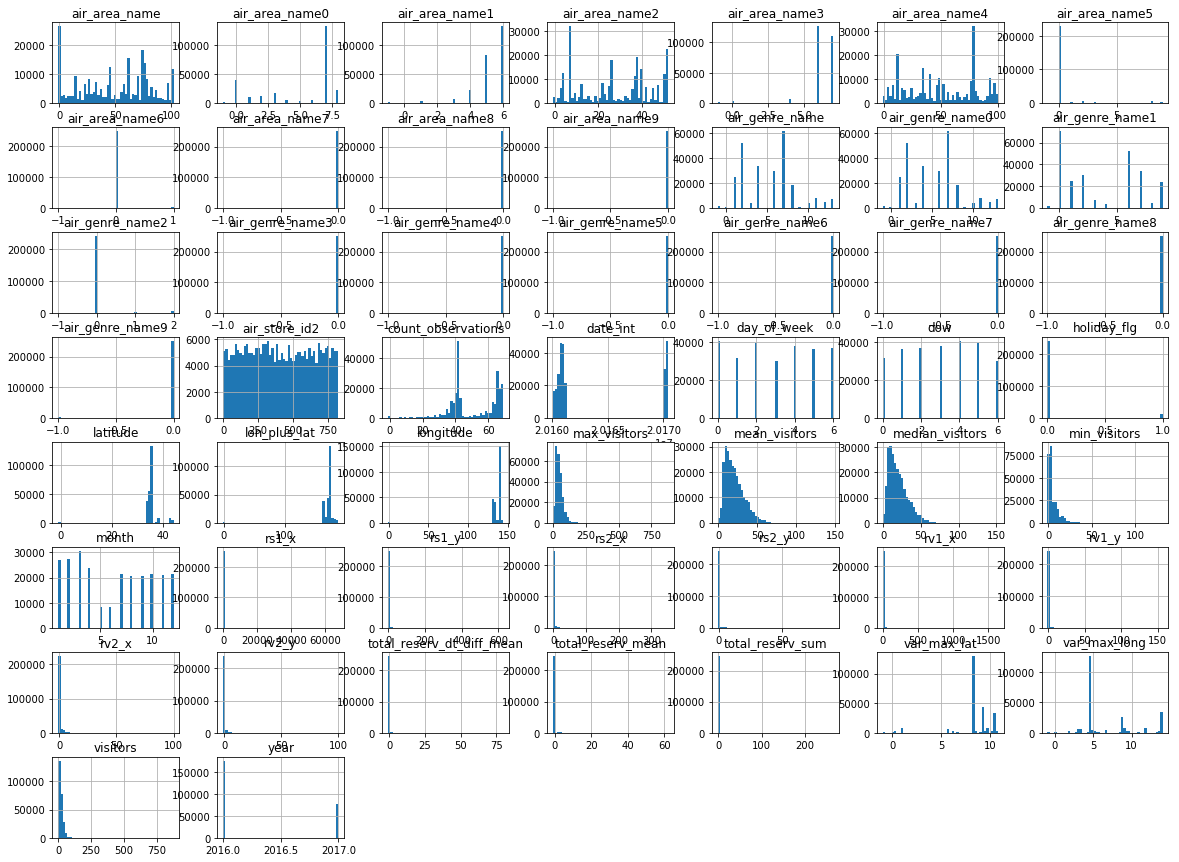

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20, 15))
plt.show()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


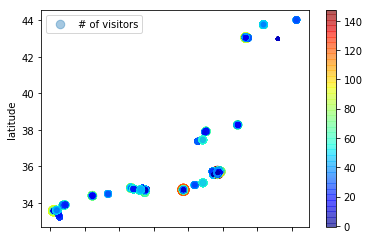

In [12]:
train.plot(kind="scatter", x="longitude", y="latitude", 
                              alpha=0.4, s=train["mean_visitors"], 
                              label="# of visitors", c=train["mean_visitors"], 
                              cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [60]:
ts = pd.DataFrame(train['mean_visitors'])
ts = ts.set_index(train['visit_date'])
ts.index = ts.index.to_datetime()
ts.index.name = 'visit_date'
ts = ts.groupby(ts.index).mean()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
ts.sort_index().head()

,mean_visitors
visit_date,
2016-01-01,19.415914
2016-01-02,29.872265
2016-01-03,25.202241
2016-01-04,17.536310
2016-01-05,17.928354


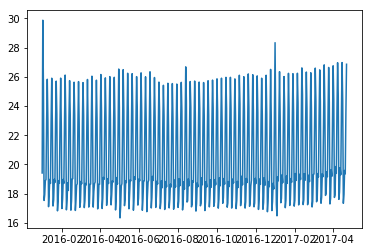

In [49]:
plt.plot(ts)

In [67]:
ts_dates = ts.index.to_series().as_matrix()
ts_visitors = ts.mean_visitors.as_matrix()

window_size = 13
window = np.ones(window_size)/float(window_size)
ts_avg = np.convolve(ts_visitors, window, 'same')

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(ts_dates, ts_visitors, 
         size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(ts_dates, ts_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "Visitors 1 Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Visitors'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

In [65]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.mean_visitors, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


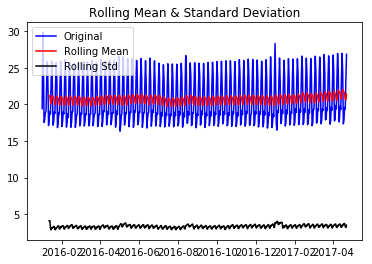

Results of Dickey-Fuller Test:
Test Statistic                  -0.813280
p-value                          0.815190
#Lags Used                      13.000000
Number of Observations Used    464.000000
Critical Value (1%)             -3.444522
Critical Value (5%)             -2.867789
Critical Value (10%)            -2.570099
dtype: float64


In [66]:
test_stationarity(ts)